In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

#Membaca file CSV
df = pd.read_csv('1.csv')

#Menampilkan nama kolom untuk referensi
print(f'Nama Kolom: {df.columns}')

Nama Kolom: Index(['0', '1502', '2215', '2153', '1'], dtype='object')


In [69]:
#Memilih kolom yang sesuai
x_data = df['1502']  
y_data = df['2215']  
z_data = df['2153']  

#Fungsi untuk menerapkan low-pass dan high-pass filter
def butter_filter(data, cutoff, fs, btype='low'):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(1, normal_cutoff, btype=btype, analog=False)
    return filtfilt(b, a, data)

#Frekuensi sampling dan frekuensi cutoff 
fs = 1000  
cutoff = 1  

#Menerapkan filter pada setiap data
x_b = x_data  #Data tanpa filter (b)
x_dc = butter_filter(x_b, cutoff, fs, btype='low')  #Low-pass filter (dc)
x_ac = butter_filter(x_b, cutoff, fs, btype='high')  #High-pass filter (ac)

y_b = y_data
y_dc = butter_filter(y_b, cutoff, fs, btype='low')
y_ac = butter_filter(y_b, cutoff, fs, btype='high')

z_b = z_data
z_dc = butter_filter(z_b, cutoff, fs, btype='low')
z_ac = butter_filter(z_b, cutoff, fs, btype='high')

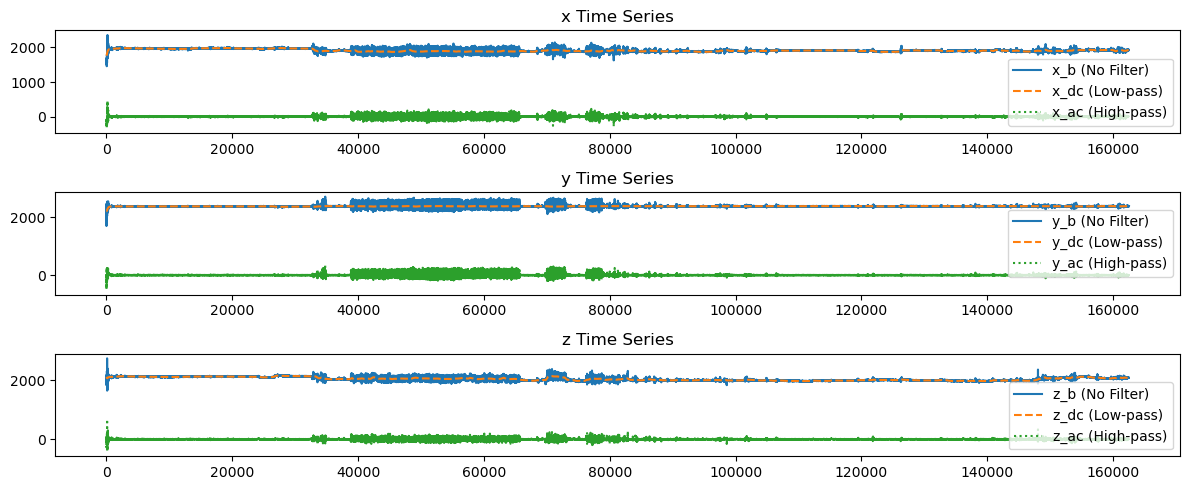

In [73]:
#Memploting hasil analisis
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 5))

#Plot untuk x data
ax1.plot(x_b, label='x_b (No Filter)')
ax1.plot(x_dc, label='x_dc (Low-pass)', linestyle='--')
ax1.plot(x_ac, label='x_ac (High-pass)', linestyle=':')
ax1.set_title('x Time Series')
ax1.legend()

#Plot untuk y data
ax2.plot(y_b, label='y_b (No Filter)')
ax2.plot(y_dc, label='y_dc (Low-pass)', linestyle='--')
ax2.plot(y_ac, label='y_ac (High-pass)', linestyle=':')
ax2.set_title('y Time Series')
ax2.legend()

#Plot untuk z data
ax3.plot(z_b, label='z_b (No Filter)')
ax3.plot(z_dc, label='z_dc (Low-pass)', linestyle='--')
ax3.plot(z_ac, label='z_ac (High-pass)', linestyle=':')
ax3.set_title('z Time Series')
ax3.legend()

plt.tight_layout()
plt.show()

In [75]:
#Menyimpan hasil ke dalam CSV (untuk setiap time series)
header = 'Time, x_b, x_dc, x_ac, y_b, y_dc, y_ac, z_b, z_dc, z_ac'

#Menggabungkan data dalam satu file CSV
output_data = pd.DataFrame({
    'Time': np.arange(len(x_data)),  # Waktu dalam bentuk indeks
    'x_b': x_b, 'x_dc': x_dc, 'x_ac': x_ac,
    'y_b': y_b, 'y_dc': y_dc, 'y_ac': y_ac,
    'z_b': z_b, 'z_dc': z_dc, 'z_ac': z_ac
})

#Menyimpan ke dalam file CSV
output_data.to_csv('/Users/apple/anaconda_projects/Tuagas AI /hw7_1101220019/Homework/Hasil Slide 4-6/Frequency Analysis 1.csv', index=False, header=True)
